# Explore past Loan Data from Prosper
## by Anh Le

## Preliminary Wrangling

> This analysis explore Prosper.com data of past Loan Listing. Prosper.com is an US company providing peer-to-peer lending service.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [320]:
loan_df = pd.read_csv('prosperLoanData.csv')

In [321]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [322]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Data Cleaning

In [323]:
clean_loan_df = loan_df.copy()

In [324]:
clean_loan_df.rename({'ProsperRating (numeric)':'ProsperRating_numeric',
               'ProsperRating (Alpha)':'ProsperRating_alpha',
                'ListingCategory (numeric)':'ListingCategory_numeric',
               'TradesNeverDelinquent (percentage)':'TradesNeverDelinquent_percentage'},axis=1,inplace=True)

In [325]:
clean_loan_df.CreditScoreRangeLower.value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12923
640.0    12199
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1593
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      554
480.0      346
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

In [326]:
clean_loan_df.CreditScoreRangeUpper.value_counts()

699.0    16492
679.0    16366
719.0    15471
739.0    12923
659.0    12199
759.0     9267
779.0     6606
799.0     4624
639.0     4172
619.0     3602
819.0     2644
539.0     1593
559.0     1474
839.0     1409
579.0     1357
599.0     1125
859.0      567
519.0      554
499.0      346
879.0      212
479.0      141
19.0       133
459.0       36
899.0       27
439.0        5
379.0        1
Name: CreditScoreRangeUpper, dtype: int64

> #### The credit score lower and upper attributes start from 0 to about 900, so it will be meaningful to categorize them into ranges. The ranges are ranked and allocated with the scoring boundaries according to Experian website https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/ . A new attributed "fico_creditscore" will be created to hold the credit score ranges.

In [327]:
#Fico credit score
fico = {"Extremely Poor": [0,299],
        "Very Poor":[300,579],
       "Fair":[580,669],
       "Good":[670,739],
       "Very Good":[740,799],
       "Exceptional":[800,850],
       "Extremely Exceptional":[851,900]}

#Taking a conservative approach to those credit score range Lower and Upper fall into 2 different categories, 
#the final fico rating will be the lower category
def find_fico_rating(lower, upper):
    fico_rating = "None"
    for x,y in fico.items():
        if (lower >= y[0] and upper <= y[1]) or (lower >= y[0] and lower <= y[1] and upper > y[1]):
            fico_rating = x
            break
    return fico_rating
        
clean_loan_df['fico_creditscore'] = clean_loan_df.apply(lambda x: find_fico_rating(x['CreditScoreRangeLower'],x['CreditScoreRangeUpper']),axis=1)        
    

In [328]:
clean_loan_df[['CreditScoreRangeLower','CreditScoreRangeUpper','fico_creditscore']].sample(5)

,CreditScoreRangeLower,CreditScoreRangeUpper,fico_creditscore
99950,640.0,659.0,Fair
42504,700.0,719.0,Good
91175,640.0,659.0,Fair
9052,540.0,559.0,Very Poor
14462,780.0,799.0,Very Good


In [329]:
clean_loan_df.fico_creditscore.value_counts()

Good                     44886
Fair                     37464
Very Good                20497
Very Poor                 5507
Exceptional               4620
None                       591
Extremely Exceptional      239
Extremely Poor             133
Name: fico_creditscore, dtype: int64

In [333]:
print('No. of CreditScoreRangeLower = Null is',clean_loan_df[clean_loan_df.CreditScoreRangeLower.isnull()].ListingKey.count())

print('No. of CreditScoreRangeUpper = Null is',clean_loan_df[clean_loan_df.CreditScoreRangeUpper.isnull()].ListingKey.count())



No. of CreditScoreRangeLower = Null is 591
No. of CreditScoreRangeUpper = Null is 591


> #### 591 fico_creditscore are "None", which reflect the number of Null values of CreditScoreRangeLower and CreditScoreRangeUpper

In [706]:
ordinal_var_dict = {'LoanStatus': ['Cancelled','Current','FinalPaymentInProgress','Completed','Past Due (1-15 days)',
                                   'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
                                  'Past Due (91-120 days)','Past Due (>120 days)','Chargedoff','Defaulted'],
                   'ProsperScore':[10,9,8,7,6,5,4,3,2,1],
                   'ProsperRating_alpha':['AA','A','B','C','D','E','HR'],
                   'fico_creditscore':['Extremely Exceptional','Exceptional','Very Good','Good','Fair','Very Poor',
                                      'Extremely Poor']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        clean_loan_df[var] = clean_loan_df[var].astype(ordered_var)
    else: # pre-v0.21
        clean_loan_df[var] = clean_loan_df[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [335]:
clean_loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

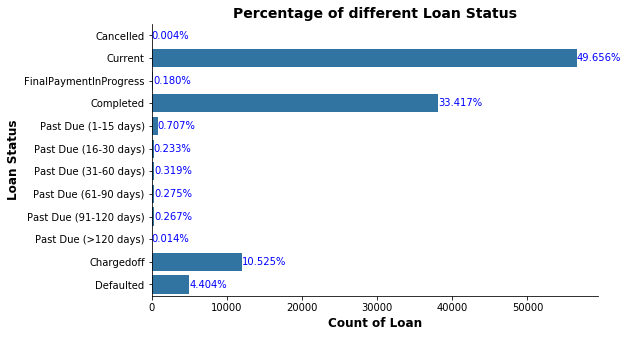

In [443]:
#if not provided, defaults to rcParams["figure.figsize"] = [6.4, 4.8].

plt.figure(figsize=(8,5))

base_color = sb.color_palette()[0]
sb.countplot(data=clean_loan_df,y='LoanStatus',color=base_color);

# add annotations
n_points = clean_loan_df.shape[0]
cat_counts = clean_loan_df.LoanStatus.value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.3f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+5, loc, pct_string, ha = 'left',va='center', color = 'b')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Percentage of different Loan Status',fontsize=14,fontweight='bold')
plt.xlabel('Count of Loan',fontsize=12,fontweight='bold')
plt.ylabel('Loan Status',fontsize=12,fontweight='bold');


> #### The % of Chargedoff and Defaulted Loans are relatively high, in total, about 15% of the total number of loans, and about 50% of the number of Completed Loans. Hence, this analysis will verify the efficiency of the credit scores and risk ratings that Prosper.com uses. 


### What is the structure of your dataset?

> The data consists attributes of 113937 loan listings on Prosper.com. The attributes included details such as the loan amount, the loan status, the loan rating, the estimated yield, the borrower rating, the borrower income, the borrower's historical performance, percentage of the listing funded, and the number of investors invested.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is Loan Status. The % of bad loans including chargedoff and defaulted are relatively high. Hence, this analysis will verify the effectiveness of the credit scores and risk ratings that Prosper.com uses. 
> Another thing to note is that Prosper.com is still doing quite well since 2005, so the business model should be working fine, and perhaps the loss of the bad loans isn't that much, so the investors still return to Prosper.com. This analysis will also look into these areas.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - The credit score of the borrower & the Prosper score
> - The borrower APR: as this factors in the % fees that the borrower needs to pay
> - The estimated loss: is the estimated principal loss on charge-offs. It reflects the Prosper estimation of principal loss of the listing, hence it worths exploring
> - The loan amount
> - LP_NetPrincipalLoss & LP_CustomerPayment: this is to find out how much investors lost for the bad loans.

### Subseting the Data and a new variable for bad loan identification
>- As the analysis focus on bad (i.e. chargedoff and defaulted) and good (i.e. completed) loans, a new dataframe subset_loan_df which includes only these 3 Loan Status to avoid the noise that may created by other Loan Status. These loans will be called as concluded Loans.

>- A new variable "is_badloan" will be created to identify the status of the loan, with 0 refers to completed loan and 1 refers to bad loan. 

In [705]:

subset_loan_df = clean_loan_df[clean_loan_df.LoanStatus.isin(['Defaulted','Chargedoff','Completed'])].copy()


In [453]:
subset_loan_df.shape[0]

55084

In [577]:
subset_loan_df['is_badloan'] = subset_loan_df.apply(lambda x: 'No' if x.LoanStatus == 'Completed' else 'Yes',axis=1)

In [578]:
subset_loan_df[['is_badloan','LoanStatus']].sample(5)

,is_badloan,LoanStatus
64891,Yes,Defaulted
67570,Yes,Chargedoff
99422,No,Completed
26769,No,Completed
21691,Yes,Defaulted


In [623]:
ordinal_var_dict = {'is_badloan': ['No','Yes']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        subset_loan_df[var] = subset_loan_df[var].astype(ordered_var)
    else: # pre-v0.21
        subset_loan_df[var] = subset_loan_df[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Univariate Exploration

### ProsperScore

In [459]:
subset_loan_df.ProsperScore.value_counts()

8     4516
6     3945
5     3284
9     3216
7     3154
4     2731
10    1653
3     1566
2     1295
1      613
Name: ProsperScore, dtype: int64

In [461]:
subset_loan_df[subset_loan_df['ProsperScore'].isnull() == False].ListingKey.count()

25973

> #### Only about 50% of the loans have non-null ProsperScore. However, this is an important attribute, and it's customer risk score built using historical Prosper data, so it should not be replaced with any value that is not provided by Prosper. The analysis will proceed with the non-null values. 

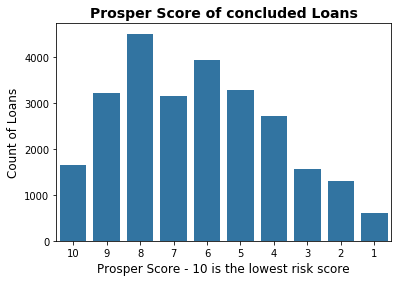

In [462]:
sb.countplot(data=subset_loan_df,x='ProsperScore',color=base_color);

plt.title('Prosper Score of concluded Loans',fontsize=14,fontweight='bold')
plt.xlabel('Prosper Score - 10 is the lowest risk score',fontsize=12)
plt.ylabel('Count of Loans',fontsize=12);

> #### ProsperScore is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. 

> #### The ProsperScore distribution is unimodal, with score of 8 has the highest count loans, followed by ProsperScore 6, and then 5. 

> #### The scores reflecting high risk such as 4, 3 and 2 also contribute relatively high number of loans. This suggests that the borrowers with high risk score are able to obtain the loan from Prosper.com

### ProsperRating_alpha

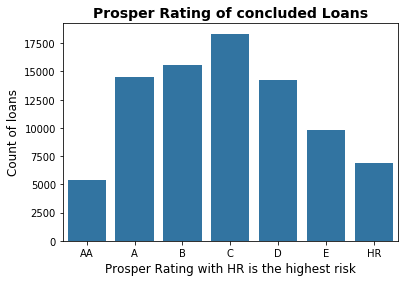

In [463]:
sb.countplot(x=clean_loan_df.ProsperRating_alpha, color=base_color);

plt.title('Prosper Rating of concluded Loans',fontsize=14,fontweight='bold')
plt.xlabel('Prosper Rating with HR is the highest risk',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);

> #### The Prosper Rating of C has the highest count of loans, followed by B, and then A and D. The Rating E and HR also have high number of loans. 

### fico_creditscore

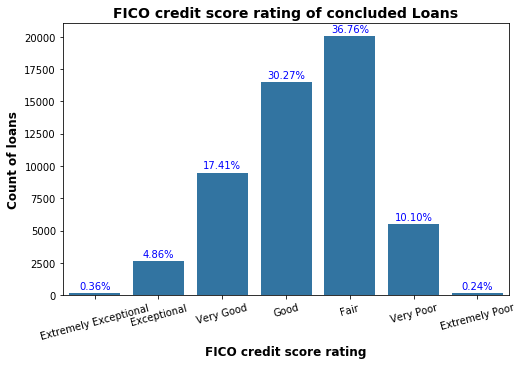

In [464]:
plt.figure(figsize = [8, 5]) 
sb.countplot(x=subset_loan_df[subset_loan_df.fico_creditscore.isnull()==False].fico_creditscore,color=base_color);

# add annotations
n_points = subset_loan_df[subset_loan_df.fico_creditscore.isnull()==False].shape[0]
cat_counts = subset_loan_df.fico_creditscore.value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc,count+300, pct_string, ha = 'center', color = 'b')

plt.xticks(rotation=15)
plt.title('FICO credit score rating of concluded Loans',fontsize=14,fontweight='bold')
plt.xlabel('FICO credit score rating',fontsize=12,fontweight='bold')
plt.ylabel('Count of loans',fontsize=12,fontweight='bold');

> #### FICO credit score of the "Fair" range has the highest count of Loans, followed by the "Good" range, and then the "Very Good". The "Very Poor" contributes 10% of the concluded loans as well despite its high risk nature. This confirms that high risk borrowers are able to take loans from Prosper.com

### LoanOriginalAmount

In [465]:
subset_loan_df.LoanOriginalAmount.describe()

count    55084.000000
mean      6261.892746
std       5217.758039
min       1000.000000
25%       2600.000000
50%       4500.000000
75%       8000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

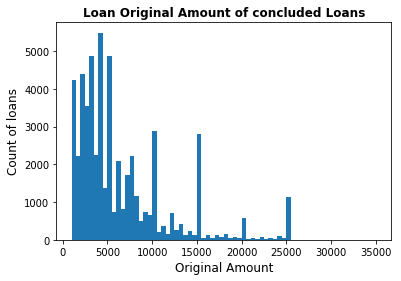

In [466]:
bin_edges = np.arange(1000, subset_loan_df['LoanOriginalAmount'].max()+500, 500)
plt.hist(x=subset_loan_df.LoanOriginalAmount, bins=bin_edges);
plt.title('Loan Original Amount of concluded Loans',fontsize=12,fontweight='bold')
plt.xlabel('Original Amount',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);

> #### Amounts at fix values such as \\$4K, \\$5K, \\$10K, \\$15K, \\$20K and \\$25K have the high numer of loans. In general, at Prosper.com, the loan amounts are quite small, most of them lower than \\$10K, this suggests that the loans perhaps are more for personal.

### BorrowerAPR

In [467]:
subset_loan_df.BorrowerAPR.describe()

count    55059.000000
mean         0.222194
std          0.088177
min          0.006530
25%          0.149740
50%          0.214340
75%          0.295100
max          0.512290
Name: BorrowerAPR, dtype: float64

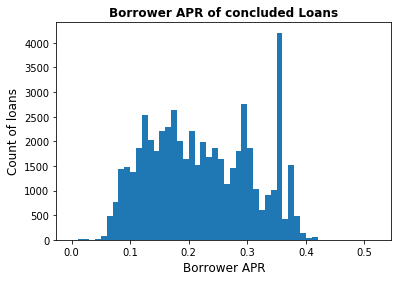

In [468]:
bin_edges = np.arange(0, subset_loan_df.BorrowerAPR.max()+0.01, 0.01)
plt.hist(x=subset_loan_df.BorrowerAPR, bins=bin_edges);
plt.title('Borrower APR of concluded Loans',fontsize=12,fontweight='bold')
plt.xlabel('Borrower APR',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);

> #### The borrower APR of 0.35 has the highest count of loans, and most of the loans has Borrower APR <= 0.35

### EstimatedLoss

In [494]:
subset_loan_df.EstimatedLoss.describe()

count    26005.000000
mean         0.093795
std          0.055062
min          0.004900
25%          0.052000
50%          0.098000
75%          0.140500
max          0.366000
Name: EstimatedLoss, dtype: float64

In [640]:
subset_loan_df[(subset_loan_df.EstimatedLoss.isnull() == False) & (subset_loan_df.is_badloan == 'No')].EstimatedLoss.count()


19664

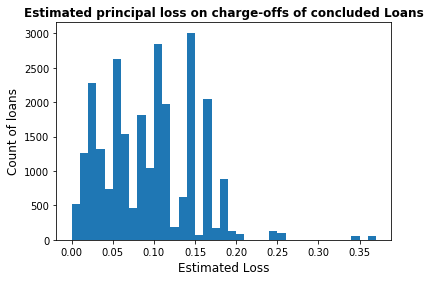

In [499]:
bin_edges = np.arange(0, subset_loan_df.EstimatedLoss.max()+0.01, 0.01)
plt.hist(x=subset_loan_df[subset_loan_df.EstimatedLoss.isnull()==False].EstimatedLoss,bins=bin_edges);
plt.title('Estimated principal loss on charge-offs of concluded Loans',fontsize=12,fontweight='bold')
plt.xlabel('Estimated Loss',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);

> #### Estimated loss is the estimated principal loss on charge-offs. Most of the loans have the Estimated Loss < = 0.16. The Estimated Loss of 0.14 has the highest count of loans, followed by 0.1 and then 0.05.

### LP_NetPrincipalLoss: The principal that remains uncollected after any recoveries.


In [501]:
subset_loan_df.LP_NetPrincipalLoss.describe()

count    55084.000000
mean      1409.465678
std       3235.209535
min       -954.550000
25%          0.000000
50%          0.000000
75%       1298.210000
max      25000.000000
Name: LP_NetPrincipalLoss, dtype: float64

In [528]:
subset_loan_df[subset_loan_df.LP_NetPrincipalLoss < 0 ]['LP_NetPrincipalLoss'].count()


68

In [532]:
subset_loan_df[subset_loan_df.LP_NetPrincipalLoss < 0 ][['LP_GrossPrincipalLoss','LoanOriginalAmount','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_NetPrincipalLoss','LP_InterestandFees','LP_NonPrincipalRecoverypayments','LoanStatus']].sample(5)


,LP_GrossPrincipalLoss,LoanOriginalAmount,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_NetPrincipalLoss,LP_InterestandFees,LP_NonPrincipalRecoverypayments,LoanStatus
15222,413.86,1750,1819.42,1336.16,-60.16,483.26,26.70,Chargedoff
24618,1.24,5000,7716.84,4865.98,-7.51,2850.86,59.29,Defaulted
19500,523.37,12000,15506.52,11256.38,-139.14,4250.14,56.90,Defaulted
31078,1388.64,25000,31574.54,23614.27,-2.90,7960.27,82.75,Defaulted
72488,34.56,1500,1984.16,1482.09,-48.78,502.07,0.04,Defaulted


>#### Logically, LP_NetPrincipalLoss should not be smaller than 0; the only possible reason for such cases is that the borrowers overpaid and didn't collected back their money which is quite rare for money sensitive borrowers. A random pick of such records show that it seems the the absolute values of LP_NetPrincipalLoss are smaller than LP_GrossPrincipalLoss ==> will convert the LP_NetPrincipalLoss from negative values to positive ones

In [542]:
subset_loan_df.loc[(subset_loan_df.LP_NetPrincipalLoss < 0),'LP_NetPrincipalLoss'] = subset_loan_df.loc[
    (subset_loan_df.LP_NetPrincipalLoss < 0),'LP_NetPrincipalLoss'].apply(lambda x : x*(-1))


In [543]:
subset_loan_df[subset_loan_df.LP_NetPrincipalLoss < 0]['LP_NetPrincipalLoss'].count()


0

In [572]:
subset_loan_df.LP_NetPrincipalLoss.describe()

count    55084.000000
mean      1409.688764
std       3235.112333
min          0.000000
25%          0.000000
50%          0.000000
75%       1298.210000
max      25000.000000
Name: LP_NetPrincipalLoss, dtype: float64

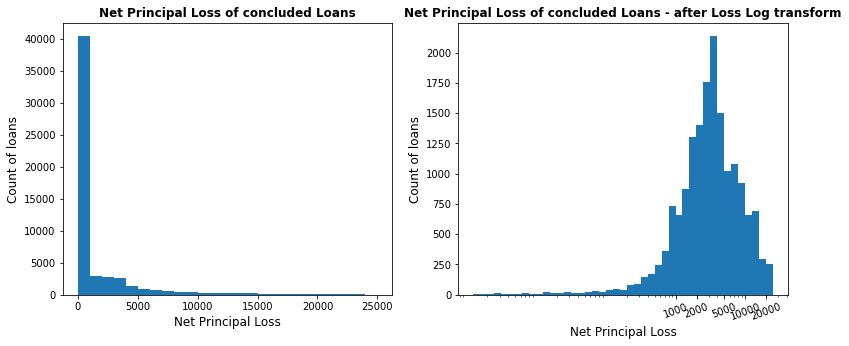

In [664]:
plt.figure(figsize = [13, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, subset_loan_df.LP_NetPrincipalLoss.max()+1000, 1000)
plt.hist(x=subset_loan_df.LP_NetPrincipalLoss, bins = bin_edges)
plt.title('Net Principal Loss of concluded Loans',fontsize=12,fontweight='bold')
plt.xlabel('Net Principal Loss',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_bin_edges = 10**np.arange(0.1, np.log10(subset_loan_df.LP_NetPrincipalLoss.max())+0.1, 0.1)
plt.hist(subset_loan_df.LP_NetPrincipalLoss, bins = log_bin_edges)
plt.xscale('log')
tick_locs = [1000, 2000, 5000,10000,20000]
plt.xticks(tick_locs, tick_locs,rotation=20);
plt.title('Net Principal Loss of concluded Loans - after Loss Log transform',fontsize=12,fontweight='bold')
plt.xlabel('Net Principal Loss',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);



>#### The Net Principal Loss of about \\$3000 has the highest count of loans i.e. about 2200 loans.

### LP_CustomerPayments: Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.

In [650]:
subset_loan_df.LP_CustomerPayments.describe()

count    55084.000000
mean      5927.689107
std       5657.651386
min         -2.349900
25%       2029.977500
50%       4208.945000
75%       7936.377500
max      40702.390000
Name: LP_CustomerPayments, dtype: float64

In [651]:
subset_loan_df[subset_loan_df.LP_CustomerPayments < 0 ].LP_CustomerPayments.count()

1

In [652]:
subset_loan_df[subset_loan_df.LP_CustomerPayments < 0 ][['LP_GrossPrincipalLoss','LoanOriginalAmount','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_NetPrincipalLoss','LP_InterestandFees','LP_NonPrincipalRecoverypayments','LoanStatus']]


,LP_GrossPrincipalLoss,LoanOriginalAmount,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_NetPrincipalLoss,LP_InterestandFees,LP_NonPrincipalRecoverypayments,LoanStatus
28384,3000.0,3000,-2.3499,0.0,3000.0,-2.3499,0.0,Chargedoff


>#### LP_CustomerPayments is Pre charge-off cumulative gross payments made by the borrower on the loan. Logically, the Customer Payment shouldn't be < 0. The only record with -2.3499 value is the same as LP_InterestandFees, so it will be changed to 0.

In [655]:
subset_loan_df.loc[(subset_loan_df.LP_CustomerPayments < 0),'LP_CustomerPayments'] = 0

In [656]:
subset_loan_df[subset_loan_df.LP_CustomerPayments < 0 ].LP_CustomerPayments.count()

0

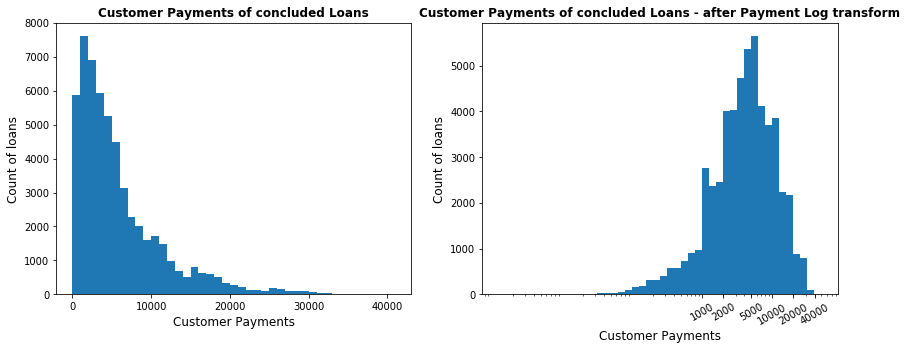

In [666]:
plt.figure(figsize = [14, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, subset_loan_df.LP_CustomerPayments.max()+1000, 1000)
plt.hist(x=subset_loan_df.LP_CustomerPayments, bins = bin_edges)
plt.title('Customer Payments of concluded Loans',fontsize=12,fontweight='bold')
plt.xlabel('Customer Payments',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_bin_edges = 10**np.arange(0.1, np.log10(subset_loan_df.LP_CustomerPayments.max())+0.1, 0.1)
plt.hist(subset_loan_df.LP_CustomerPayments, bins = log_bin_edges)
plt.xscale('log')
tick_locs = [1000, 2000, 5000,10000,20000,40000]
plt.xticks(tick_locs, tick_locs,rotation=30);
plt.title('Customer Payments of concluded Loans - after Payment Log transform',fontsize=12,fontweight='bold')
plt.xlabel('Customer Payments',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);


>#### The Customer Payment of about \\$5000 has the highest count of loans i.e. about 5600 loans.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable of interest is Loan Status. The Distribution shows that the % of Chargedoff and Defaulted Loans are relatively high, in total, about 15% of the total number of loans, and about 50% of the number of Completed Loans. No unusual points noticed. The variable was converted to an ordered Categorical type in order to illustrate the point that "Chargedoff" and "Defaulted" are bad loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To investigate CreditScoreRangeLower and CreditScoreRangeUpper, a new variable fico_creditscore was created to group the values of these 2 variables into ranges. The new var fico_creditscore makes the presentation of the credit score ranges more meaningful to readers.

> LP_NetPrincipalLoss & LP_CustomerPayment have negative values which are illogical, so such values have been changed to positive. While ploting this variable in its natural unit, the distribution is highly skewed to the left and a long tail of data points with large values. After applying the Logarithmic transformation, the data follows a somewhat normal distribution. This gives us a better understanding of the distribution of data that is larger than 0. 

## Bivariate Exploration


### 1. Loan Status and ProsperRating_alpha
> #### Loan Status of concluded Loan is either good or bad: good for the completed loans, while bad is for defaulted or chargedoff

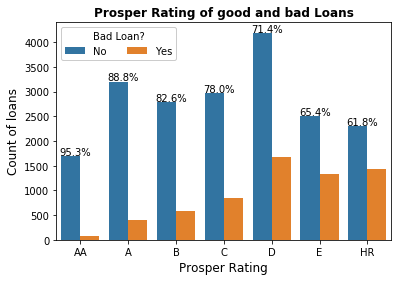

In [631]:


ax = sb.countplot(data = subset_loan_df, x = 'ProsperRating_alpha', hue = 'is_badloan')
ax.legend(loc = 'best', ncol = 2, framealpha = 1, title = 'Bad Loan?');
plt.title('Prosper Rating of good and bad Loans',fontsize=12,fontweight='bold')
plt.xlabel('Prosper Rating',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);

# add annotations
cat_counts = subset_loan_df.ProsperRating_alpha.value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    success_count = subset_loan_df[(subset_loan_df.ProsperRating_alpha == label.get_text()) &
                                   (subset_loan_df.is_badloan == 'No')].is_badloan.count()
    
    # get the text property for the label of success rate
    pct_string= '{:0.1f}%'.format(100*(success_count/cat_counts.get(label.get_text())))
   
    # print the annotation just below the top of the bar
    plt.text(loc-0.1, success_count+20, pct_string, ha = 'center', color = 'black')




> #### The plot shows that Prosper.com has good success rate across all its loan Ratings. The success Rate of each loan rating = the % of good loans (i.e. completed loans) / the total number of (good & bad) loans in the rating. The lowest success rate is 61.8% and is for loans with HR rating. This suggests that Prosper Rating and the company working model is good.

### 2. The Loans  Status  and  ProsperScore

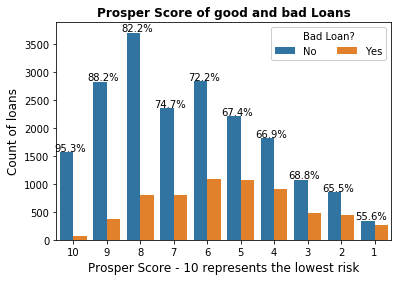

In [632]:
#g = sb.FacetGrid(data = clean_loan_df, col = 'LoanStatus', col_wrap=4, height=2.5)
#g.map(sb.countplot, 'ProsperRating_alpha');

ax = sb.countplot(data = subset_loan_df, x = 'ProsperScore', hue = 'is_badloan')
ax.legend(loc = 'best', ncol = 2, framealpha = 1, title = 'Bad Loan?');
plt.title('Prosper Score of good and bad Loans',fontsize=12,fontweight='bold')
plt.xlabel('Prosper Score - 10 represents the lowest risk',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);

# add annotations
cat_counts = subset_loan_df.ProsperScore.value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    success_count = subset_loan_df[(subset_loan_df.ProsperScore == int(label.get_text())) &
                                   (subset_loan_df.is_badloan == 'No')].is_badloan.count()
   
    #get the text property for the label of success rate
    pct_string= '{:0.1f}%'.format(100*(success_count/cat_counts.get(int(label.get_text()))))
   
    # print the annotation just below the top of the bar
    plt.text(loc-0.1, success_count+20, pct_string, ha = 'center', color = 'black')




>#### ProsperScore is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.

> #### The plot shows that Prosper.com has good success rate across all its Prosper Score. The success Rate of each loan Prosper Score = the % of good loans (i.e. completed loans) / the total number of (good & bad) loans in the Score. The lowest success rate is 55.6% and is for loans with the highest risk Score. This suggests that Prosper Score and the company working model is good.

### 3. The Loan Status and  FICO credit score

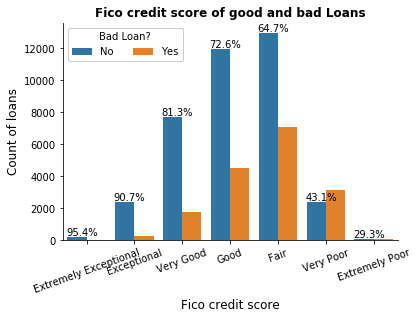

In [633]:

ax = sb.countplot(data = subset_loan_df, x = 'fico_creditscore', hue = 'is_badloan')
ax.legend(loc = 'best', ncol = 2, framealpha = 1, title = 'Bad Loan?');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Fico credit score of good and bad Loans',fontsize=12,fontweight='bold')
plt.xticks(rotation=20)
plt.xlabel('Fico credit score',fontsize=12)
plt.ylabel('Count of loans',fontsize=12);


# add annotations
cat_counts = subset_loan_df.fico_creditscore.value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    success_count = subset_loan_df[(subset_loan_df.fico_creditscore == label.get_text()) &
                                   (subset_loan_df.is_badloan == 'No')].is_badloan.count()
   
    #get the text property for the label of success rate
    pct_string= '{:0.1f}%'.format(100*(success_count/cat_counts.get(label.get_text())))
   
    # print the annotation just below the top of the bar
    plt.text(loc-0.1, success_count+100, pct_string, ha = 'center', color = 'black')




>#### FICO credit score is used my lending institutions to reflect the borrower credit risk. 

> #### Prosper.com has bad success rate for the loan with "Very Poor" and "Extremely Poor" FICO score. The success Rate of each FICO Score = the % of good loans (i.e. completed loans) / the total number of (good & bad) loans in the FICO Score rating. The lowest success rate is 29.3% and is for loans with the "Extremely Poor" Score, follwed by 43.1% for loans with "Very Poor" score. This suggests that there are rooms for improvement for Prosper.com in these 2 FICO ratings, and that investors should look for other risk ratings as well if they want to lend money to borrowers of "Very Poor" and "Extremly Poor" ratings.

### 3. Loan Status  and  Loan Amount

In [636]:
import warnings
warnings.filterwarnings("ignore")

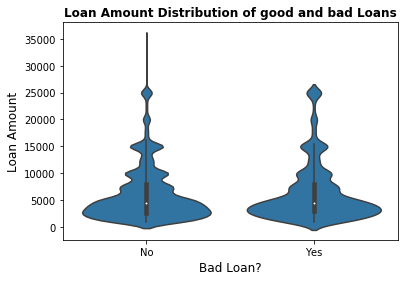

In [637]:
base_color = sb.color_palette()[0]
sb.violinplot(data = subset_loan_df, x = 'is_badloan', y = 'LoanOriginalAmount', color = base_color);
plt.title('Loan Amount Distribution of good and bad Loans',fontsize=12,fontweight='bold')
plt.xlabel('Bad Loan?',fontsize=12)
plt.ylabel('Loan Amount',fontsize=12);

>#### Both the good and bad loans have similar distribution for the Loan Amount. This suggests the Loan Amount doesn't affect the status of the loan.

### 4. The Loans Status  and  Borrower APR 

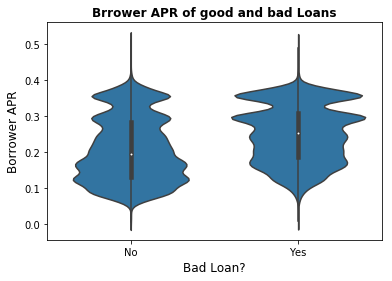

In [641]:
base_color = sb.color_palette()[0]
sb.violinplot(data = subset_loan_df, x = 'is_badloan', y = 'BorrowerAPR', color = base_color);
plt.title('Brrower APR of good and bad Loans',fontsize=12,fontweight='bold')
plt.xlabel('Bad Loan?',fontsize=12)
plt.ylabel('Borrower APR',fontsize=12);

>#### The median of Borrower APR of the bad loans is higher than that of the good loans. The plots shows that more bad loans have high Borrower APR.

### 5. Loan Status  and  Estimated Loss

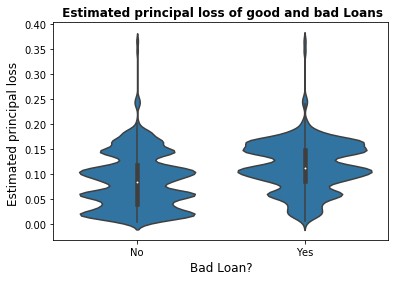

In [644]:
base_color = sb.color_palette()[0]
sb.violinplot(data = subset_loan_df, x = 'is_badloan', y = 'EstimatedLoss', color = base_color);
plt.title(' Estimated principal loss of good and bad Loans',fontsize=12,fontweight='bold')
plt.xlabel('Bad Loan?',fontsize=12)
plt.ylabel('Estimated principal loss ',fontsize=12);

>#### Most of the bad loans have the estimated principle loss higher than about 7%. The median of the estimated principle loss of the bad loan is higher than that of the good loans. This suggests that Prosper.com estimation is good and helpful to investors.

### 5. Loan OriginalAmount vs NetPrincipal Loss of Bad Loans

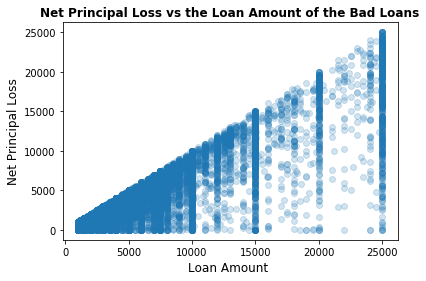

In [649]:

plt.scatter(y = subset_loan_df[subset_loan_df.is_badloan=='Yes'].LP_NetPrincipalLoss, 
            x = subset_loan_df[subset_loan_df.is_badloan=='Yes'].LoanOriginalAmount,
           alpha = 1/5);
plt.title('Net Principal Loss vs the Loan Amount of the Bad Loans',fontsize=12,fontweight='bold')
plt.ylabel('Net Principal Loss',fontsize=12)
plt.xlabel('Loan Amount ',fontsize=12);
            

>#### For the bad loans, higher number of loans lost the full principle when the Loan Amounts lower than \\$15K. Also, higher number loans lost high principle with the Loan Amount at the "standard" amounts such as \\$10K, \\$15K, \\$20K and \\$25K. This can be due to more bad loans taken for amount lower than \\$15K and of the standard amounts.

### 6. Loan OriginalAmount vs Customer Payments of Bad Loans

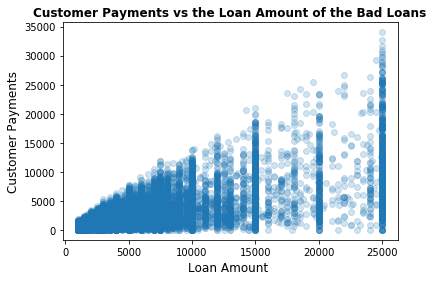

In [670]:

plt.scatter(y = subset_loan_df[subset_loan_df.is_badloan=='Yes'].LP_CustomerPayments, 
            x = subset_loan_df[subset_loan_df.is_badloan=='Yes'].LoanOriginalAmount,
           alpha = 1/5);
plt.title('Customer Payments vs the Loan Amount of the Bad Loans',fontsize=12,fontweight='bold')
plt.ylabel('Customer Payments',fontsize=12)
plt.xlabel('Loan Amount ',fontsize=12);
            

>#### For loans < \\$10K, more borrowers pay the amount which is same or higher than the original loan amount. For higher loans, very few borrowers can do so. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Prosper.com has good success rate across all its Prosper Ratings and Prosper Score. The success Rate of each Prosper rating = the % of good loans (i.e. completed loans) / the total number of (good & bad) loans of the rating. For the Prosper rating, the lowest success rate is 61.8% and is for loans with HR rating. For Prosper score, the lowest success rate is 55.6% and is for loans with the highest risk Score. Both suggest that Prosper Rating, Prosper Score and the company business model are good.

> Prosper.com has bad success rate for the loan with "Very Poor" and "Extremely Poor" FICO score. The success Rate of each FICO Score = the % of good loans (i.e. completed loans) / the total number of (good & bad) loans in the FICO Score rating. The lowest success rate is 29.3% and is for loans with the "Extremely Poor" Score, follwed by 43.1% for loans with "Very Poor" score. This suggests that there are rooms for improvement for Prosper.com in these 2 FICO ratings.

> As such, further analysis will be using Prosper Rating.

>The median of Borrower APR of the bad loans is higher than that of the good loans. This suggests Prosper.com is doing a good job in determining the right Borrower APR for high risk loans.


> Most of the bad loans have the estimated principle loss higher than 7%. The median of the estimated principle loss of the bad loan is higher than that of the good loans. This suggests that Prosper.com estimation is good and helpful to investors.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>For the bad loans, higher number of loans lost the full principle when the Loan Amounts lower than \\$15K. Also, higher number loans lost high principle with the Loan Amount of the "standard" amounts such as \\$10K, \\$15K, \\$20K and \\$25K. This can be due to more bad loans taken for amount lower than \\$15K and of the standard amounts.

> For loans < \\$10K, more borrowers pay up to same or higher than the original loan amount. For higher loans, very few borrowers can do so.

## Multivariate Exploration


### 1. Borrower APR vs Prosper Rating vs is_badloan

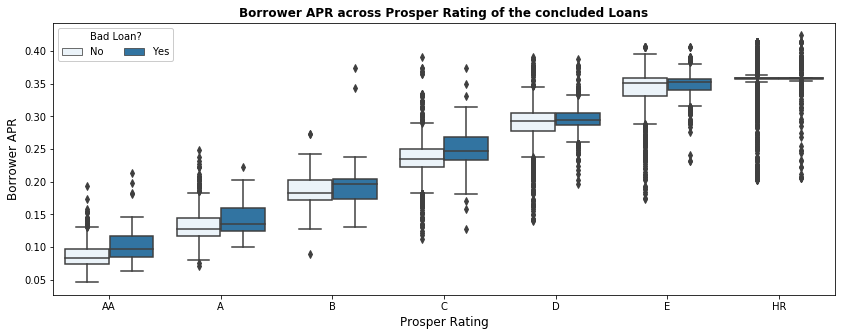

In [682]:
plt.figure(figsize=(14, 5))
base_color = sb.color_palette()[0]
ax = sb.boxplot(data=subset_loan_df,x='ProsperRating_alpha',y='BorrowerAPR',
                   hue='is_badloan',color=base_color)
ax.legend(loc = 'best', ncol = 2, framealpha = 1, title = 'Bad Loan?');
plt.title('Borrower APR across Prosper Rating of the concluded Loans',fontsize=12,fontweight='bold')
plt.xlabel('Prosper Rating',fontsize=12)
plt.ylabel('Borrower APR',fontsize=12);
#inner='quartile'

> #### In general, Borrower APR of the bad loans are higher than that of the Good Loans, except for those loan listings of high risk with Prosper Rating of D, E and HR. This suggests that Prosper.com is doing a good job in setting the Borrower APR.
>#### The BorrowerAPR median difference between 2 consecutive Prosper Rating is about 5%. 


### 2. LP_NetPrincipalLoss vs LoanOriginalAmount vs ProsperRating of bad loans

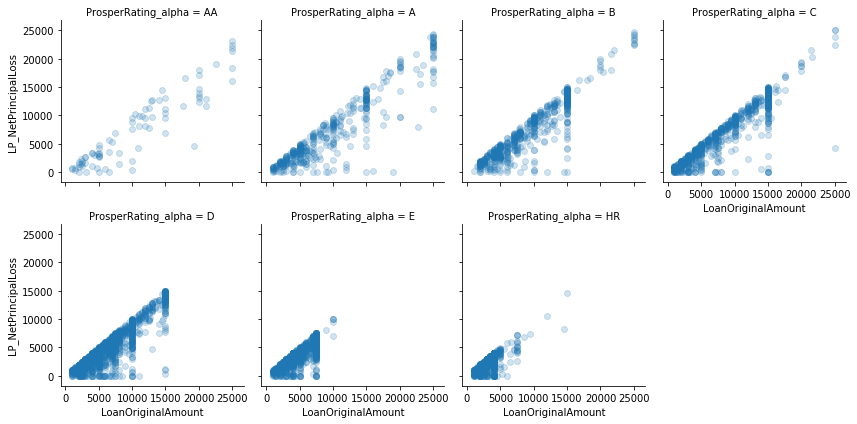

In [702]:
g = sb.FacetGrid(data=subset_loan_df[subset_loan_df.is_badloan=='Yes'],
                 col='ProsperRating_alpha',col_wrap=4,margin_titles=True);
g.map(plt.scatter,'LoanOriginalAmount','LP_NetPrincipalLoss',alpha = 1/5);



>#### For high risk ratings - D, E, HR, the bad Loans have the Amounts <= \\$15K, and the Net principle loss can  be the full principle or not. For the good risk rating - AA and A, the bad loans can be of higher amount and the net principle loss are also high. For the middle range of risk rating - B and C, the bad loans can be of higher amount, and the principle loss of the large loan is amost the full principle.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Prosper.com is doing a good job in setting the Borrower APR. Borrower APR of the bad loans are higher than that of the Good Loans, except for those high risk loan listings with Prosper Rating of D, E and HR.

> The BorrowerAPR median difference between 2 consecutive Prosper Rating is about 5%.

>- For high risk ratings - D, E, HR, the bad Loans have low Amounts, they are <= \\$15K; and the Net principle loss can  be the full principle or almost 0. 
>- For the good risk rating - AA and A, the bad loans spread from low to  very high amount (\\$25K). The net principle loss are also high, most of them are close to the principle, only few loss are low
>- For the middle range of risk rating - B and C, the bad loans can be of high amount, but less number of bad loans having amount > \\$15K compared to those of the good ratings.  The principle loss of the large loans are close to the full principle.

### Were there any interesting or surprising interactions between features?

> Though the number of bad loans for good ratings like AA and A is low, but the net principle loss is high. Hence, the Prosper Rating is effective, but still have rooms for improvement.

### Conclusion:
> Loans on Prosper.com are more of the consumer market with low Loan Amounts, ranging from \\1K$ to \\$25K. Most of the loans having the amount lower than \\$10K.  

> Prosper.com business model is effective:
>- Prosper Rating is effective in rating the risk of the loans. The success rate (rate of loans get completed) is high across all Prosper Rating, with the lowest is 61.8% for the highest risk Rating.
>-  Prosper.com is doing a good job in setting the Borrower APR. Borrower APR of the bad loans are higher than that of the Good Loans across most of the Prosper Ratings, except for those high risk loan listings with Prosper Rating of D, E and HR, they are about the same.
>- The median of the estimated principle loss of the bad loan is higher than that of the good loans. This suggests that Prosper.com estimation is good and helpful to investors.

> However, the % of bad loans including chargedoff and defaulted are relatively high, about 50% of the completed loans, and the Net principle loss is considerable. Hence, there are still rooms for improvement.
>- For high risk ratings - D, E, HR, the bad Loans have low Amounts, they are <= \\$15K; and the Net principle loss can  be the full principle or almost 0. 
>- For the good risk rating - AA and A, the bad loans spread from low to  very high amount (\\$25K). The net principle loss are also high, most of them are close to the principle, only few loss are low
>- For the middle range of risk rating - B and C, the bad loans can be of high amount, but less number of bad loans having amount > \\$15K compared to those of the good ratings.  The principle loss of the large loans are close to the full principle.

>- If I was to invest in any loan on Prosper.com, I'd choose the middle Prosper risk rating B and C, as they have high success rate of 82% & 78% respectively, and come with good Interest rate ( Good interest rate is derived from the fact that the Borrower APR median for these 2 ratings is >= 17%).
